In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import model_selection, svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
all_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/roman_urdu_all_data.csv')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df_negative_complete = pd.read_csv('/content/drive/My Drive/Colab Notebooks/negative_roman_urdu.csv')
# df_positive = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_pos.csv')
# df_hard_negative_complete = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_hard_neg.csv')
# df_negative = df_negative_complete.sample(frac = .80)
# df_hard_negative = df_hard_negative_complete.sample(frac =.10)

Mounted at /content/drive


In [ ]:
# all_df = df_hard_negative.append(df_positive, ignore_index=True)
# all_df = all_df.append(df_negative, ignore_index=True)
# all_df.to_csv('/content/drive/My Drive/Colab Notebooks/merged_roman_urdu.csv', sep=',', index=False) 
# all_df.dropna(subset=['text'], inplace=True)
all_df = all_df.astype(str)
print(all_df.shape)

(9527, 8)


In [ ]:
# import re
# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002500-\U00002BEF"  # chinese char
#         u"\U00002702-\U000027B0"
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         u"\U0001f926-\U0001f937"
#         u"\U00010000-\U0010ffff"
#         u"\u2640-\u2642" 
#         u"\u2600-\u2B55"
#         u"\u200d"
#         u"\u23cf"
#         u"\u23e9"
#         u"\u231a"
#         u"\ufe0f"  # dingbats
#         u"\u3030"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# for index, row in all_df.iterrows():
#     all_df.loc[index, 'text'] = re.sub('#[^\s]+','',row['text'])

# for index, row in all_df.iterrows():
#     all_df.loc[index, 'text'] = re.sub('@[^\s]+','',row['text'])

# for index, row in all_df.iterrows():
#     all_df.loc[index, 'text'] = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))",'',row['text'])   

# for index, row in all_df.iterrows():
#     all_df.loc[index, 'text'] = deEmojify(row['text'])
    
# all_df.to_csv("/content/drive/My Drive/Colab Notebooks/roman_urdu_all_data.csv" ,encoding = 'utf-8-sig')
          

In [ ]:
bow_converter = CountVectorizer()
bow_x = bow_converter.fit_transform(all_df['text'])
# words = bow_converter.get_feature_names_out()
# print(len(words))
print(bow_x.shape)

(9527, 28190)


In [ ]:
tfidf_transform = TfidfTransformer(norm=None)
tfidf_x = tfidf_transform.fit_transform(bow_x)
print(tfidf_x.shape)

(9527, 28190)


In [ ]:
from sklearn.model_selection import train_test_split
y = all_df['Label']
y = y.astype(float)
y = y.astype(int)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9522    0
9523    0
9524    0
9525    0
9526    0
Name: Label, Length: 9527, dtype: int64


In [ ]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.3 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=60c05c788fda25970c292c4025be2646c37e629af6e46d1166f86ccc3c939cd4
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
pip install Py-FS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 3.6 MB/s 


In [ ]:
import Py_FS
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, y, test_size=0.33, random_state=42)
np_tfidf_x= tfidf_x.toarray()
np_y = y.to_numpy()

GREY WOLF OPTIMIZER

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8139725338515775
Number of Features: 16368
----------------------------------------

Greywolf 1 - Fitness: 0.8139725338515775, Number of Features: 16368
Greywolf 2 - Fitness: 0.8049508078705918, Number of Features: 16249
Greywolf 3 - Fitness: 0.8047131349369273, Number of Features: 16316
Greywolf 4 - Fitness: 0.8043970255800562, Number of Features: 16272
Greywolf 5 - Fitness: 0.8043193782856326, Number of Features: 16427
Greywolf 6 - Fitness: 0.803232703283483, Number of Features: 16334
Greywolf 7 - Fitness: 0.8020932124874418, Number of Features: 16389
Greywolf 8 - Fitness: 0.7987949556803686, Number of Features: 16387
Greywolf 9 - Fitness: 0.7970055093844907, Number of Features: 16359
Greywolf 10 - Fitness: 0.7960004235983751, Number of Features: 16243
Grey

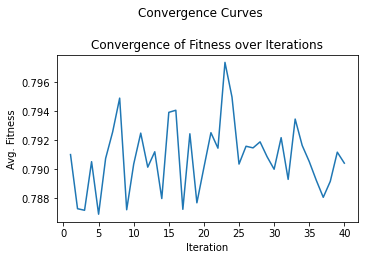

In [ ]:
solution_GWO = Py_FS.wrapper.nature_inspired.GWO(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


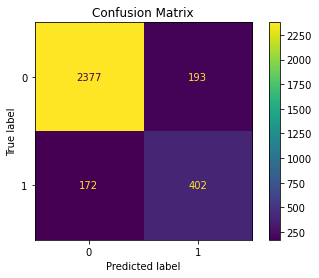

In [ ]:
res_GWO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GWO.best_agent ,classifier='svm', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GWO.f1_score}')
print(f'recall: {res_GWO.recall}')
print(f'precision: {res_GWO.precision}')
print(f'accuracy: {res_GWO.accuracy}')

F1_score: {0: 0.9286970111349873, 1: 0.6877673224978614}
recall: {0: 0.9249027237354086, 1: 0.7003484320557491}
precision: {0: 0.9325225578658297, 1: 0.6756302521008404}
accuracy: 0.8839058524173028


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


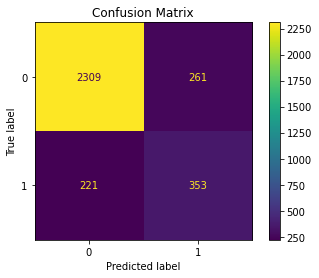

In [ ]:
res_GWO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GWO.best_agent ,classifier='knn', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GWO.f1_score}')
print(f'recall: {res_GWO.recall}')
print(f'precision: {res_GWO.precision}')
print(f'accuracy: {res_GWO.accuracy}')

F1_score: {0: 0.9054901960784313, 1: 0.5942760942760943}
recall: {0: 0.898443579766537, 1: 0.6149825783972126}
precision: {0: 0.9126482213438735, 1: 0.5749185667752443}
accuracy: 0.8466921119592875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


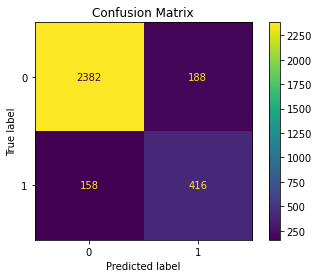

In [ ]:
res_GWO = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GWO.best_agent ,classifier='rf', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GWO.f1_score}')
print(f'recall: {res_GWO.recall}')
print(f'precision: {res_GWO.precision}')
print(f'accuracy: {res_GWO.accuracy}')

F1_score: {0: 0.9322896281800391, 1: 0.7062818336162988}
recall: {0: 0.9268482490272374, 1: 0.7247386759581882}
precision: {0: 0.9377952755905512, 1: 0.6887417218543046}
accuracy: 0.8899491094147582
